In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
import sys
print(sys.executable)

C:\Users\user\Desktop\Work_Env\Jedha_Env\jedha\Scripts\python.exe


In [3]:
df =pd.read_csv("fraudTest.csv")

In [4]:
display(df.head(5))

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
# 2. Valeurs manquantes
missing = df.isna().sum().reset_index()
missing.columns = ['colonne', 'valeurs_manquantes']
display("Valeurs manquantes par colonne", missing)



'Valeurs manquantes par colonne'

,colonne,valeurs_manquantes
0,Unnamed: 0,0
1,trans_date_trans_time,0
2,cc_num,0
3,merchant,0
4,category,0
5,amt,0
6,first,0
7,last,0
8,gender,0
9,street,0


In [6]:
# 3. Statistiques descriptives (numériques)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
stats = df[num_cols].describe().T
display("Statistiques descriptives (numériques)", stats)

'Statistiques descriptives (numériques)'

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.635331e+15,4.992346e+18
amt,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


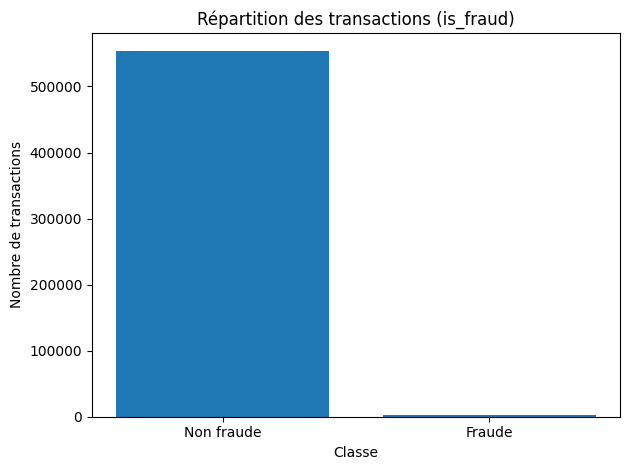

In [7]:
# 1) Bar-chart de la variable cible
plt.figure()
counts = df['is_fraud'].value_counts().sort_index()
plt.bar(['Non fraude', 'Fraude'], counts.values)
plt.title('Répartition des transactions (is_fraud)')
plt.xlabel('Classe')
plt.ylabel('Nombre de transactions')
plt.tight_layout()
plt.show()

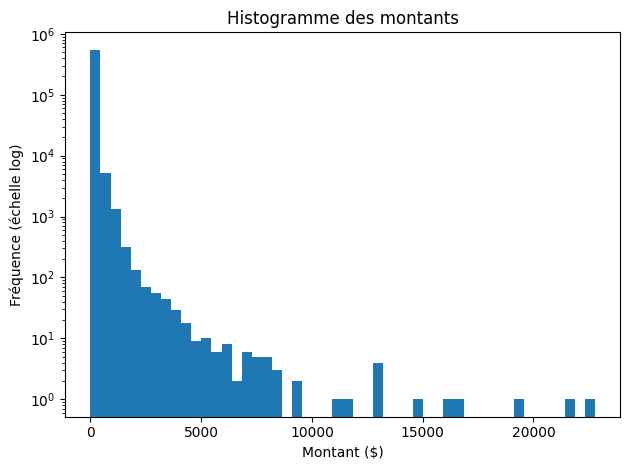

In [8]:
# 2) Histogramme des montants
plt.figure()
plt.hist(df['amt'], bins=50)
plt.yscale('log')
plt.title('Histogramme des montants')
plt.xlabel('Montant ($)')
plt.ylabel('Fréquence (échelle log)')
plt.tight_layout()
plt.show()

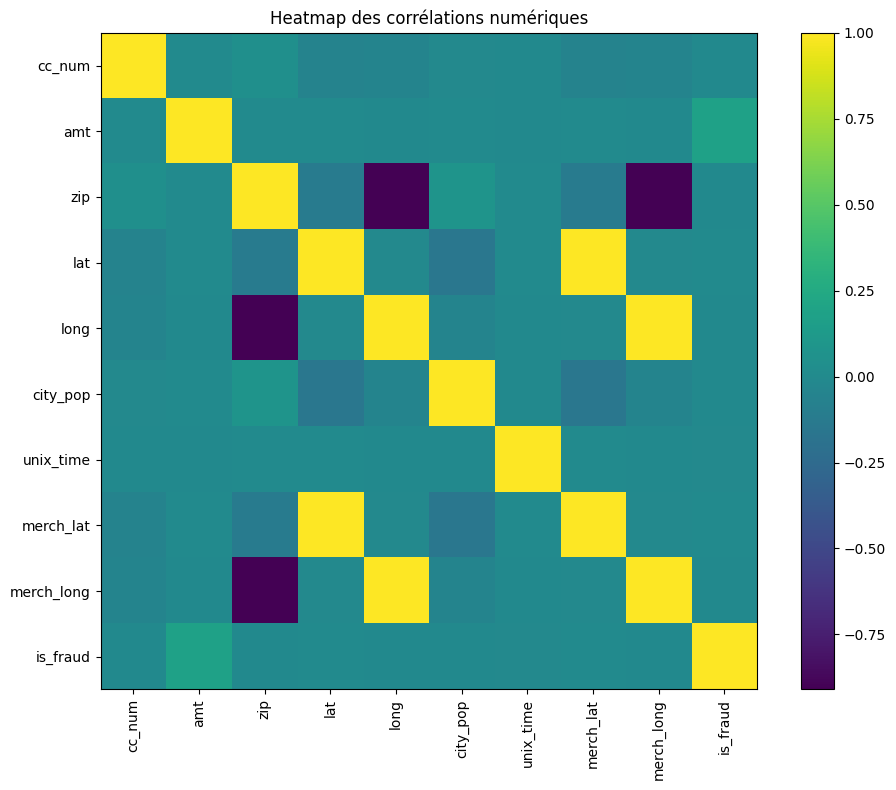

In [9]:
# 3) Heat-map des corrélations numériques
plt.figure(figsize=(10, 8))
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [c for c in num_cols if c != 'Unnamed: 0']   # on retire l’index technique
corr = df[num_cols].corr()
im = plt.imshow(corr, interpolation='nearest')
plt.colorbar(im)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Heatmap des corrélations numériques')
plt.tight_layout()
plt.show()